### 1.  Import Required Libraries


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib as mpl
np.set_printoptions(suppress=True)

### 2.  Generate and Visualize Data


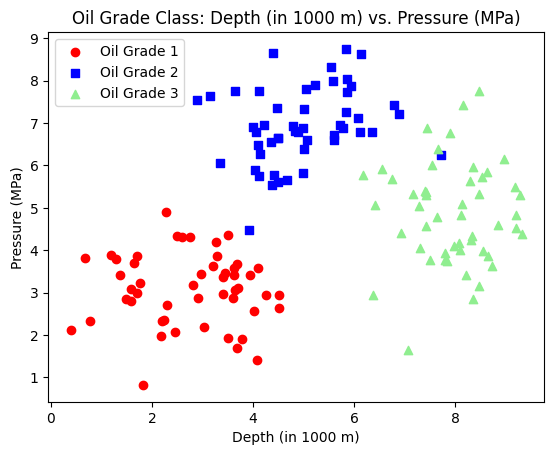

In [2]:
markers = ('o', 's', '^', 'v', '<')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
# Define cluster centers
centers = [(3, 3), (5, 7), (8, 5)]
# Generate a dataset with 3 clusters
X, y = make_blobs(n_samples=150, centers=centers, n_features=2)
# Create a color map
cmap = mpl.cm.viridis
# Plot the generated data for each class separately
for i, center in enumerate(centers):
    plt.scatter(X[y == i, 0], X[y == i, 1],   c=colors[i], marker=markers[i], label=f'Oil Grade {i+1}')
# Add labels and a legend
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Oil Grade Class: Depth (in 1000 m) vs. Pressure (MPa)')
plt.legend()
plt.show()

### 3.  Splitting data into 70% training and 30% test data:


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

#cmap = plt.cm.get_cmap('viridis', len(centers))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### 4.  Plot the generated data for each class separately


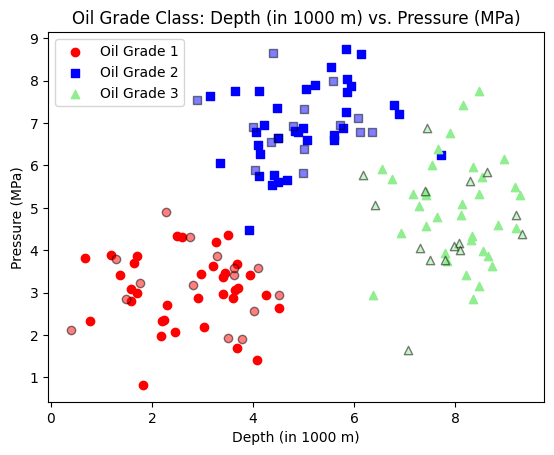

In [4]:
for i, center in enumerate(centers):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1],   c=colors[i], marker=markers[i], label=f'Oil Grade {i+1}')
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], c=colors[i], marker=markers[i], edgecolors='black', alpha=0.5)
# Add labels and a legend
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Oil Grade Class: Depth (in 1000 m) vs. Pressure (MPa)')
plt.legend()
plt.show()

### 5.  Standardizing the features:


In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 6.  Implement a Plot Decision Regions Function

In [6]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Oil Grade {cl+1}', 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

### 7.  Training a perceptron via scikit-learn


In [7]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

print('Test Data Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('Test DataAccuracy: %.3f' % ppn.score(X_test_std, y_test))

Misclassified examples: 2
Test Data Accuracy: 0.956
Test DataAccuracy: 0.956


### 8.  Training a perceptron model using the standardized training data:


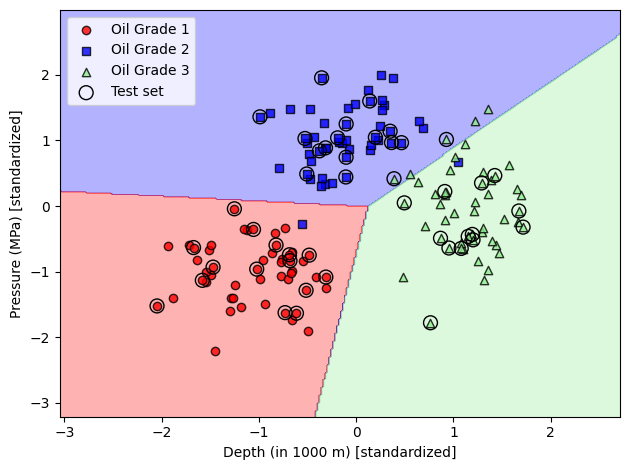

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Depth (in 1000 m) [standardized]')
plt.ylabel('Pressure (MPa) [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

### 9.  Logistic regression intuition and conditional probabilities


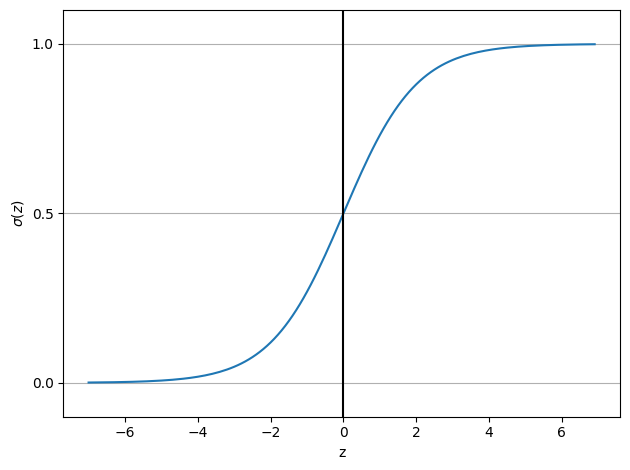

In [9]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
#plt.savefig('figures/03_02.png', dpi=300)
plt.show()

### 10.  Training a logistic regression model with scikit-learn


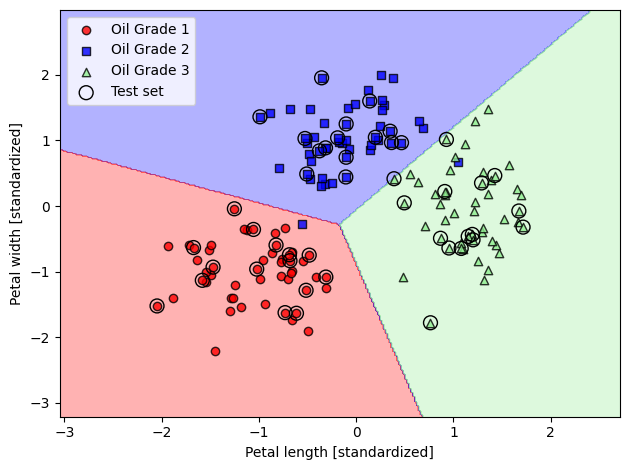

In [10]:
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()

### 11.  Making Predictions

In [11]:
lr.predict_proba(X_test_std[:3, :])
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)
lr.predict(X_test_std[:3, :])
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### 12.  Maximum margin classification with support vector machines


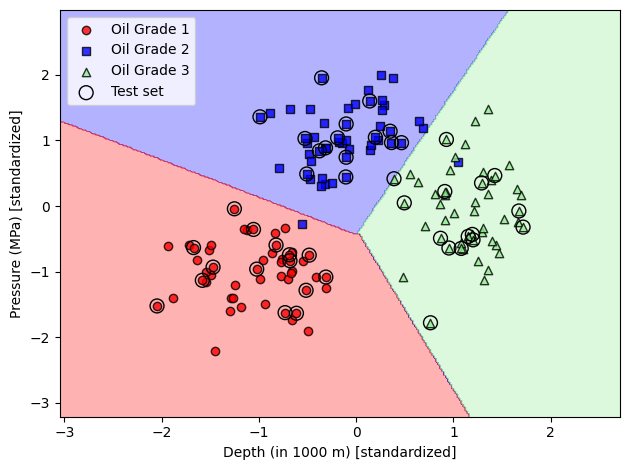

In [12]:
# ## Maximum margin intuition
# ## Dealing with the nonlinearly separable case using slack variables
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('Depth (in 1000 m) [standardized]')
plt.ylabel('Pressure (MPa) [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

### 13.  Alternative classification task implementations in scikit-learn


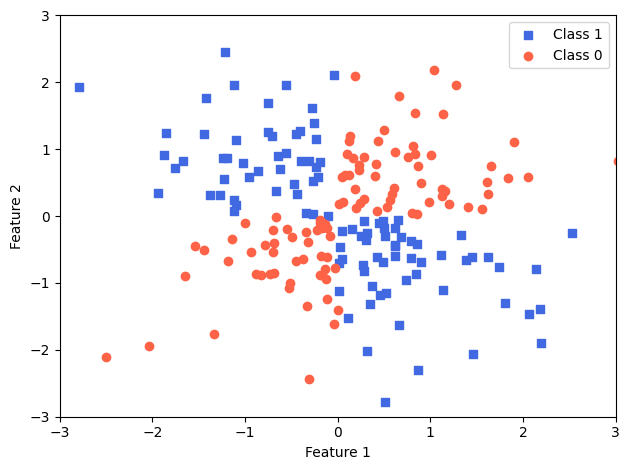

In [13]:
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')
# # Solving non-linear problems using a kernel SVM

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

### 14.  Using the kernel trick to find separating hyperplanes in higher dimensional space


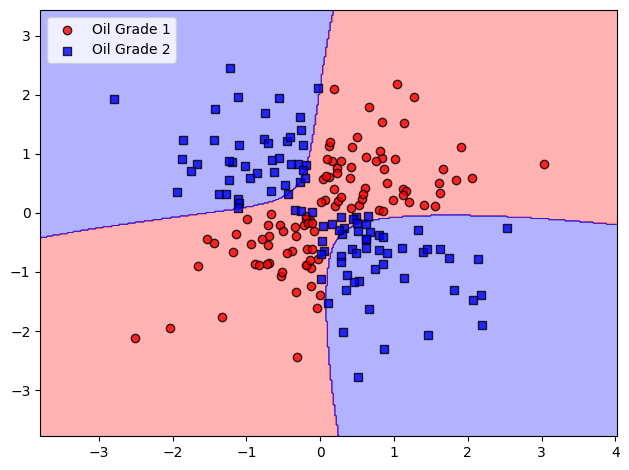

In [14]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_14.png', dpi=300)
plt.show()

### 15.  Hyperparameter set at gamma=0.2, C=1.0

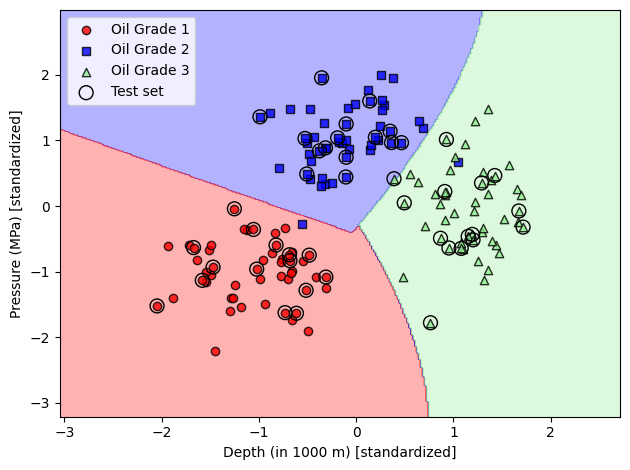

In [15]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Depth (in 1000 m) [standardized]')
plt.ylabel('Pressure (MPa) [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_15.png', dpi=300)

### 16.  Hyperparameter set at gamma=100, C=1.0

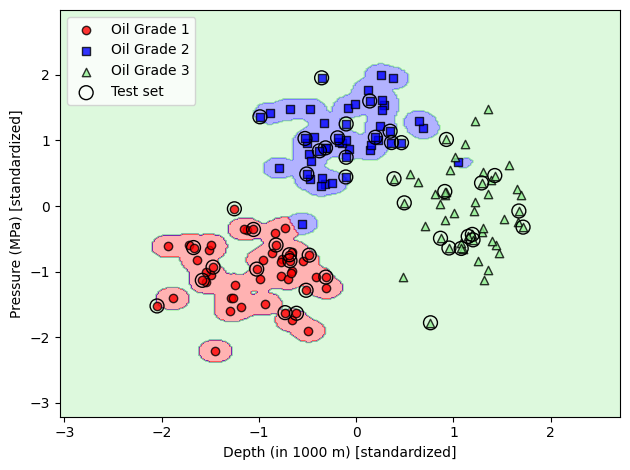

In [16]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Depth (in 1000 m) [standardized]')
plt.ylabel('Pressure (MPa) [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_16.png', dpi=300)
plt.show()

### 17.  Decision tree learning


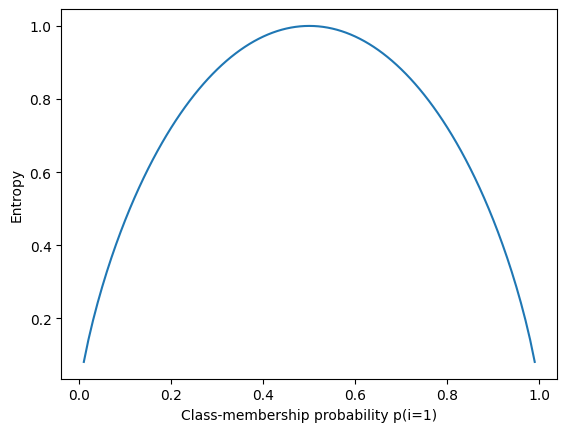

In [17]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None 
       for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
#plt.savefig('figures/03_26.png', dpi=300)
plt.show()

### 18.  Maximizing information gain - getting the most bang for the buck


In [18]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

# ## Building a decision tree
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

### 19.  Fitting Data to Decision Tree Classifier

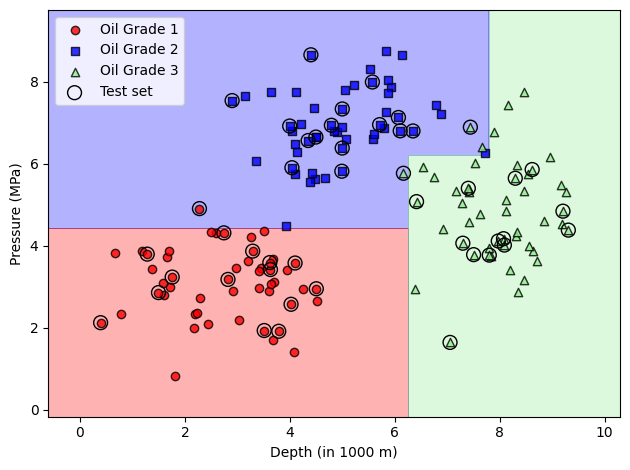

In [19]:
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_20.png', dpi=300)
plt.show()

### 20.  Analyzing Decision Tree Flowchart

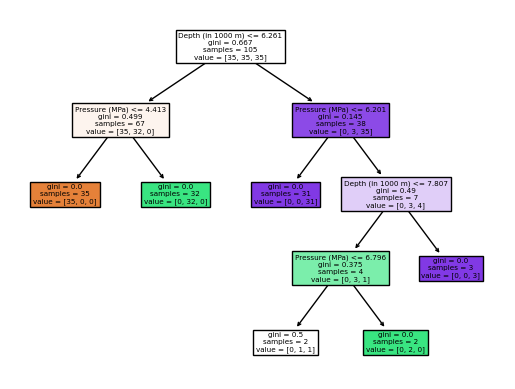

In [20]:
feature_names = ['Depth (in 1000 m)', 'Pressure (MPa)']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
#plt.savefig('figures/03_21_1.pdf')
plt.show()

### 21.  Combining weak to strong learners via random forests


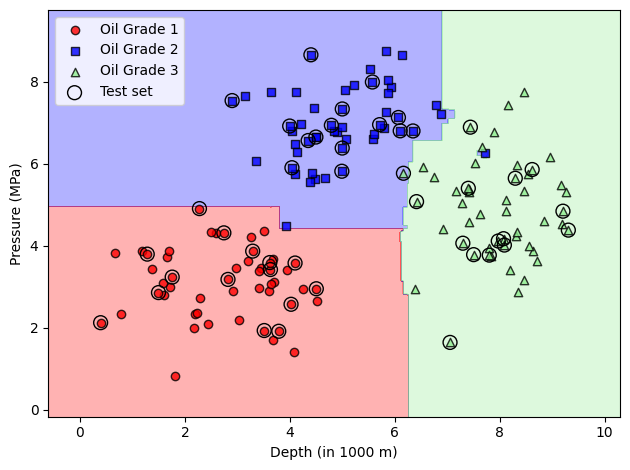

In [21]:
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_2.png', dpi=300)
plt.show()

### 22.  Introducing K Nearest Neighbors Classifier:

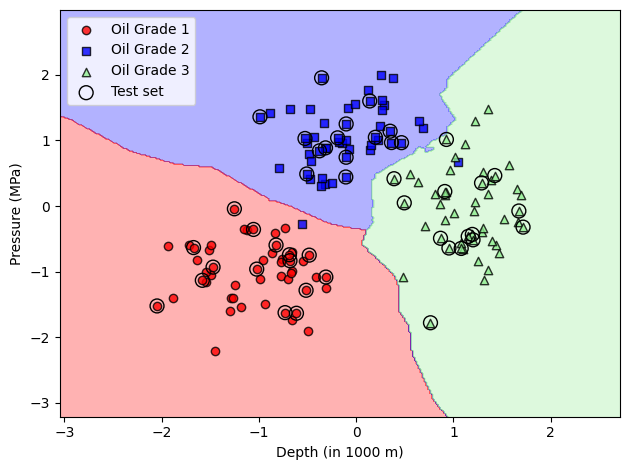

In [22]:
knn = KNeighborsClassifier(n_neighbors=3, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_24_figures.png', dpi=300)
plt.show()